<a href="https://colab.research.google.com/github/minhcong00/AI/blob/main/BT_AI_W7_abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
url = '/content/abalone.csv'
data = pd.read_csv(url)
data.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

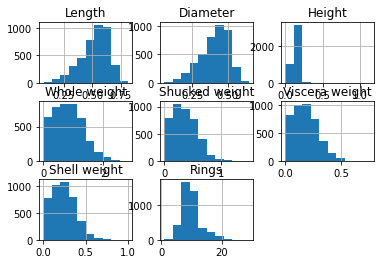

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist()
plt.show()

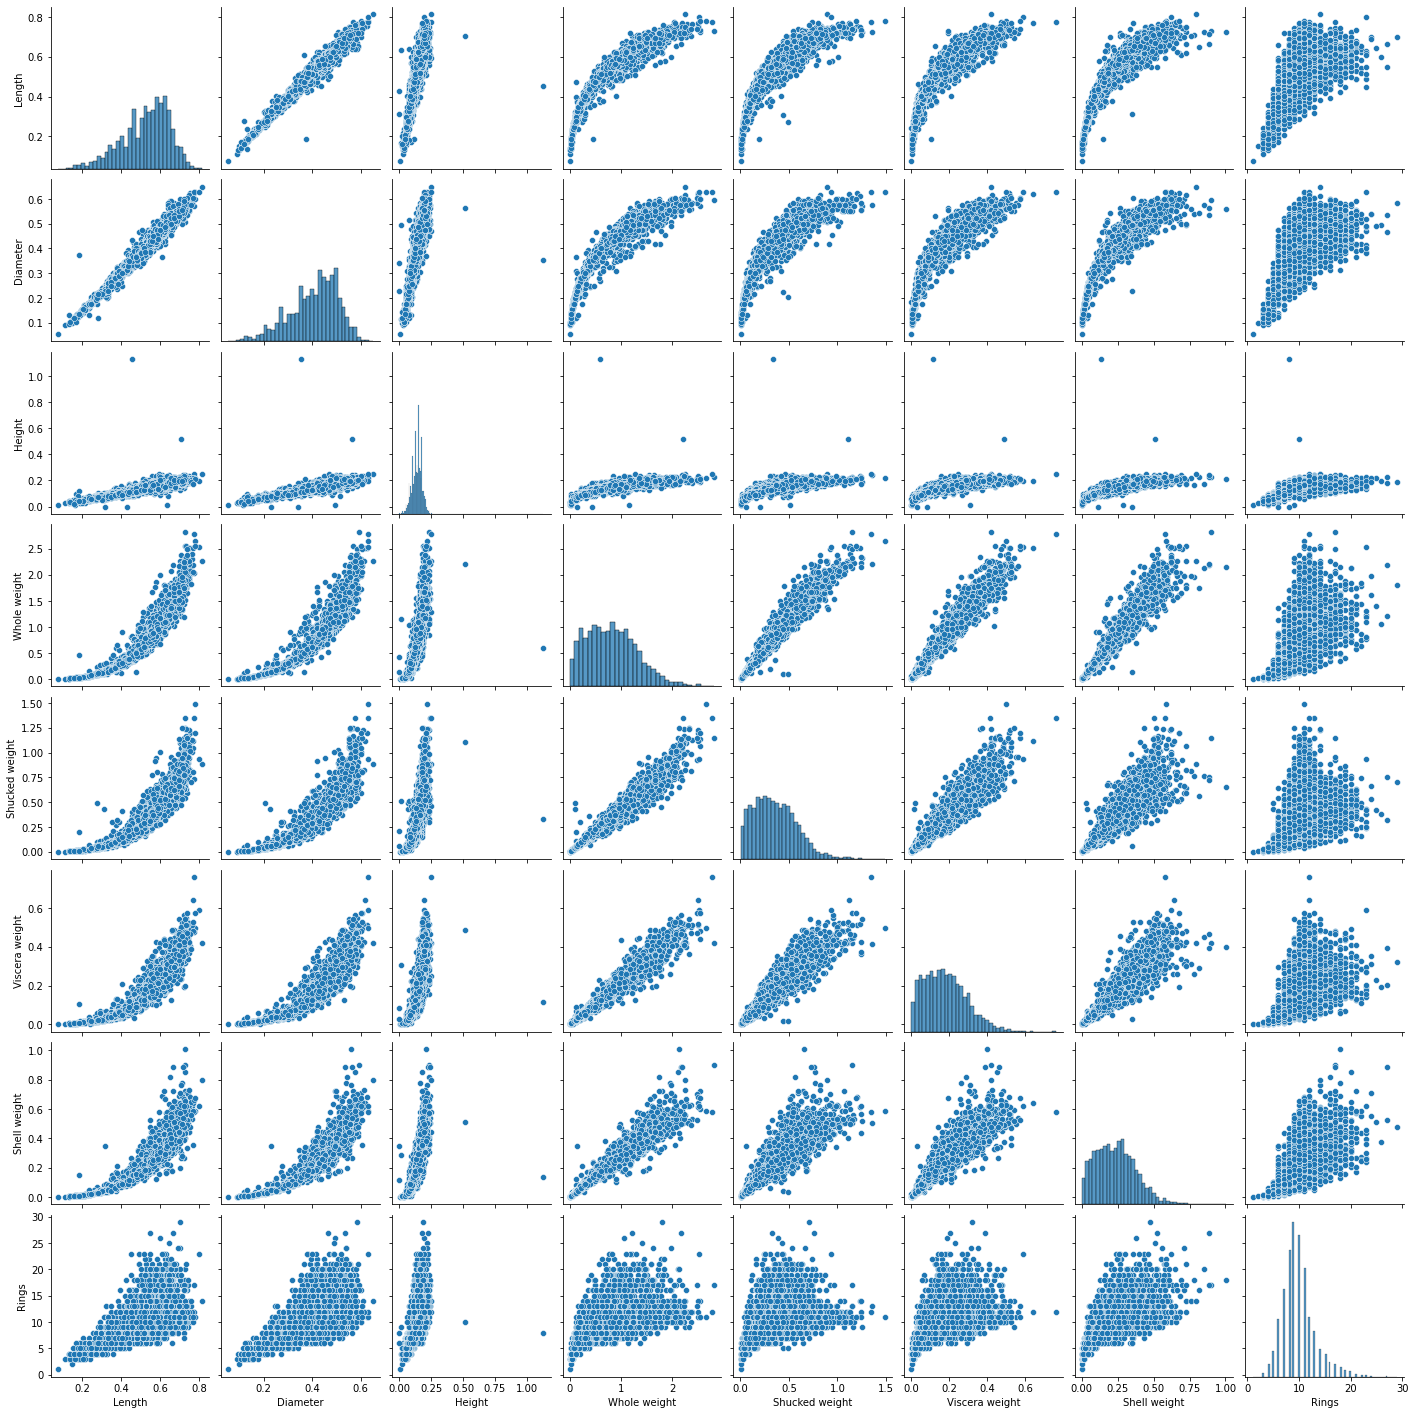

In [4]:
sns.pairplot(data)

In [ ]:
correlation = data.corr()
print(correlation)

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weig

<Axes: >

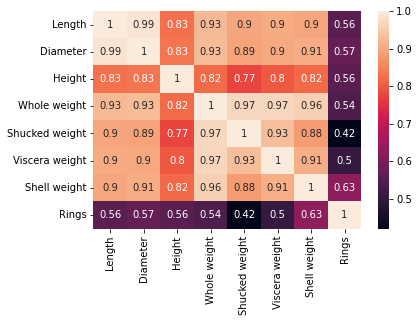

In [ ]:
sns.heatmap(correlation,annot=True)

Gia tri,Intercept la: 0.3180019610679106
Gia tri coeffient la: [0.02073653]


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


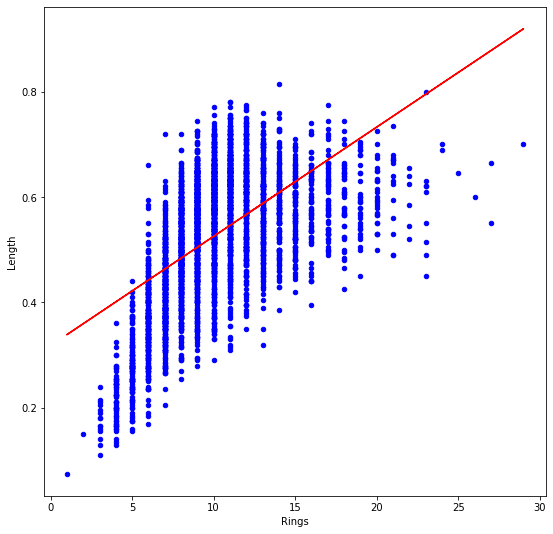

In [ ]:
# Hoi quy bac 1
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['Rings']),y=data['Length'])
print('Gia tri,Intercept la:',model.intercept_)
print('Gia tri coeffient la:',model.coef_)
model.score(pd.DataFrame(data['Rings']),data['Length'])

data.plot(kind='scatter',x='Rings',y='Length',figsize=(9,9),color='blue')
y_pred=model.predict(X=pd.DataFrame(data['Rings']))
plt.plot(data['Rings'],y_pred,color='red')

He so Intercept la: -0.022120542057336268
He so coeffient la: [ 0.08510488 -0.00274402]
Do chinh xac cua mo hinh: 0.4840053707482129


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


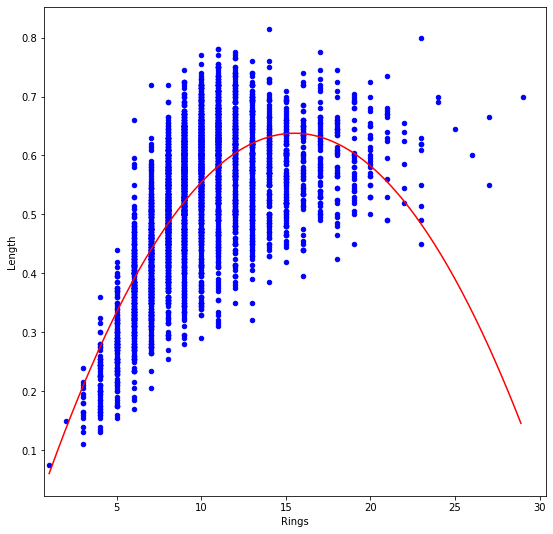

In [ ]:
#hoi quy bac 2
import numpy as np
model=linear_model.LinearRegression()
X= pd.DataFrame([data['Rings'],data['Rings']**2]).T
model.fit(X,y=data['Length'])
print('He so Intercept la:',model.intercept_)
print('He so coeffient la:',model.coef_)
print('Do chinh xac cua mo hinh:',model.score(pd.DataFrame([data['Rings'],data['Rings']**2]).T,data['Length']))

range = np.arange(data['Rings'].min(),data['Rings'].max(),0.1)
X_range = pd.DataFrame([range,range**2]).T
y_pred = model.predict(X_range)
data.plot(kind = 'scatter', x = 'Rings', y = 'Length', figsize = (9,9), color = 'blue', xlim = 0.7)
plt.plot(range, y_pred, color = 'red')

Intercept của mô hình :  0.047708191346817586
Coefient của mô hình :  [-2.79653529e-02  2.77496445e-02 -3.04938060e-03  1.25650429e-04
 -1.78381790e-06]
Độ chính xác của mô hình :  0.5407996316990737


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


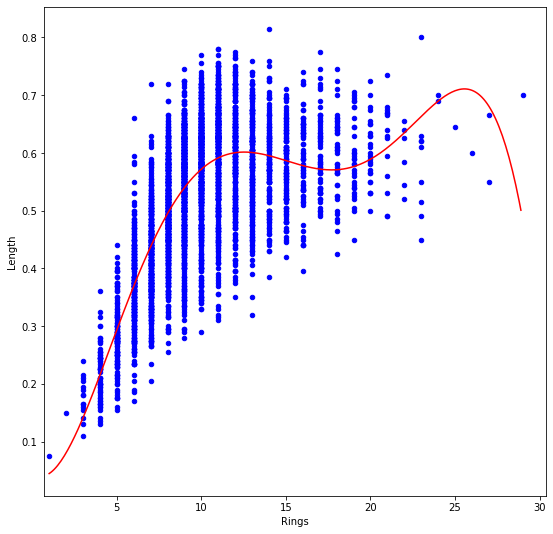

In [ ]:
#Hồi quy bậc 5
model = linear_model.LinearRegression()
X=pd.DataFrame([data['Rings'], data['Rings']**2, data['Rings']**3, data['Rings']**4, data['Rings']**5]).T
y=data['Length']
model.fit(X, y)
print('Intercept của mô hình : ', model.intercept_)
print('Coefient của mô hình : ', model.coef_)
print('Độ chính xác của mô hình : ', model.score(X,y))

range = np.arange(data['Rings'].min(),data['Rings'].max(),0.1)
X_range = pd.DataFrame([range, range**2, range**3, range**4, range**5]).T
y_pred = model.predict(X_range)
data.plot(kind = 'scatter', x = 'Rings', y = 'Length', figsize = (9,9), color = 'blue', xlim = 0.7)
plt.plot(range, y_pred, color = 'red')

Intercept của mô hình :  0.07499460690930726
Coefient của mô hình :  [ 4.81214887e-18  2.77488223e-18 -7.01713839e-18  4.81392290e-19
 -3.13486759e-18  2.88956306e-18 -1.54194885e-18 -6.49401607e-20
 -6.58784355e-18 -1.77565094e-16 -4.65888592e-15 -1.22973940e-13
  1.35921951e-13 -5.32168795e-13  3.27601433e-14  2.01701394e-13
  8.25367637e-14  4.95441375e-13  2.86428151e-13  1.63031458e-12
  2.09258560e-13  4.90114912e-13 -2.64259909e-13  6.78372980e-13
  1.24075027e-13  6.90661354e-13  3.21659472e-13 -6.45220607e-13
  2.43745111e-13 -1.30668770e-13  2.55136237e-14 -1.35985572e-14
  1.55482655e-13 -9.67325483e-13  1.66423043e-12  1.96971593e-12
  3.54933843e-13 -8.72500564e-13  1.61672808e-13]
Độ chính xác của mô hình :  0.550913489861955


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


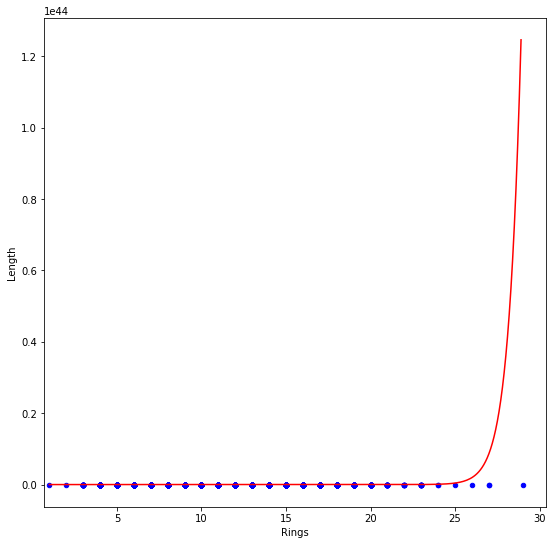

In [ ]:
#Hồi quy bậc 39
model = linear_model.LinearRegression()
X=pd.DataFrame([data['Rings'], data['Rings']**2, data['Rings']**3, data['Rings']**4, data['Rings']**5,
                data['Rings']**6, data['Rings']**7, data['Rings']**8, data['Rings']**9, data['Rings']**10,
               data['Rings']**11, data['Rings']**12, data['Rings']**13, data['Rings']**14, data['Rings']**15,
                data['Rings']**16, data['Rings']**17, data['Rings']**18, data['Rings']**19, data['Rings']**20,
               data['Rings']**21, data['Rings']**22, data['Rings']**23, data['Rings']**24, data['Rings']**25,
                data['Rings']**26, data['Rings']**27, data['Rings']**28, data['Rings']**29, data['Rings']**30,
               data['Rings']**31, data['Rings']**32, data['Rings']**33, data['Rings']**34, data['Rings']**35,
                data['Rings']**36, data['Rings']**37, data['Rings']**38, data['Rings']**39]).T
y=data['Length']
model.fit(X, y)
print('Intercept của mô hình : ', model.intercept_)
print('Coefient của mô hình : ', model.coef_)
print('Độ chính xác của mô hình : ', model.score(X,y))

range = np.arange(data['Rings'].min(),data['Rings'].max(),0.1)
X_range = pd.DataFrame([range, range**2, range**3, range**4, range**5, range**6, range**7, range**8, range**9, range**10,
                         range**11, range**12, range**13, range**14, range**15, range**16, range**17, range**18, range**19, range**20,
                         range**21, range**22, range**23, range**24, range**25, range**26, range**27, range**28, range**29, range**30,
                         range**31, range**32, range**33, range**34, range**35, range**36, range**37, range**38, range**39]).T
y_pred = model.predict(X_range)
data.plot(kind = 'scatter', x = 'Rings', y = 'Length', figsize = (9,9), color = 'blue', xlim = 0.7)
plt.plot(range, y_pred, color = 'red')